**Percent time spent in inactive, low activity, and high activity states**

Another way to parameterize sleeping versus wakeful states is to compare the percentages of time the zebrafish spends in inactive, low activity, and high activity states. There are multiple ways we can compare these percentages. For example, we can compare these percentages across genotypes, across fish, and between daytime and nighttime. 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2,
      'axes.labelsize': 18,
      'axes.titlesize': 18,
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc) 
sns.set_style('darkgrid', rc=rc)

Now we read in the tidy one minute interval data set from tutorial 2b.

In [10]:
df = pd.read_csv('./data/130315_1_minute_intervals.csv', comment = '#')

We grouped this `DataFrame` by genotype because we are first going to compare the percentage time the fish spend in each state based on their genotype. We would expect the mutant fish to have spend a smaller percent of their time in the inactive state than the wild type fish since they cannot produce melatonin, a hormone that is associated with sleep. We expect to see the mutant fish to spend more time in both the high activity and low activity states than the wildtype.

Note that we could have grouped the `DataFrame` by fish as well as by genotype, thus calculating the percentage of time that each fish spends in each state. However, we chose to pool the data from all fish within each genotype because this enables a cleaner, more efficient graphical representation of the data later on when we make plots. (Further explanation below, before the first plots.) 

In [11]:
df_grouped = df.groupby('genotype')

Defining the inactive state as zero seconds of activity in a one minute period is obvious: no movement means inactive, movement means active. Defining the low activity and high activity states is not as obvious. The paper defines low activity as less than 1 second of activity in a one minute interval and high activity as 1 second or more of activity in a one minute interval. We argue that 1 second is too short. We don't consider a fish that is active for one 60th of our time bin to be highly active. We defined low activity as less than 2 seconds of activity in a one minute interval and high activity as 2 seconds or more of activity in a one minute interval; we consider the fish to be highly active if it is active more than one 30th of our time bin.

In [12]:
inactive = df[df['activity'] == 0]
low_activity = df[df['activity'] <= 2]
high_activity = df[df['activity'] > 2]

Now we group the `DataFrame` of each state by genotype.

In [23]:
inactive = inactive.groupby('genotype')

low_activity = low_activity.groupby('genotype')

high_activity = high_activity.groupby('genotype')

To find out the percentage of time spent in each state we must count the number of intervals spent in each state and count the total number of intervals and then divide the first by the latter.

In [24]:
# Calculating the total number of intervals in the experiment
intervals = df_grouped['activity'].count()

# Tally of number of intervals in each state
inactive_int = inactive['activity'].count()
low_activity_int = low_activity['activity'].count()
high_activty_int = high_activity['activity'].count()

# Calculate percentages
inactive_per = inactive_int/intervals
low_activity_per = low_activity_int/intervals
high_activity_per = high_activty_int/intervals

# To see these values we will print the percentages
print(inactive_per)
print(low_activity_per)
print(high_activity_per)

genotype
het    0.248500
mut    0.189506
wt     0.248906
Name: activity, dtype: float64
genotype
het    0.539930
mut    0.470005
wt     0.516480
Name: activity, dtype: float64
genotype
het    0.460070
mut    0.529995
wt     0.483520
Name: activity, dtype: float64


Now we can plot our percentages. We chose a bar graph. If we had calculated the percentages of time that each fish spends in each state, we could have used box plots or beeswarm plots. However, we preferred the bar graph representation of our pooled data. We felt that the bar graph is best because we can easily show all states with all genotypes on one plot; we can't do this as easily on a beeswarm plot (e.g., we could show all three genotypes, but we feel that doing so for more than one state per plot would start to look cluttered and difficult to understand at first glance). In our opinion, the conciseness of a bar graph outweighs the trade-off that pooling of the data obcures information about the variability within each genotype. 

To make the plots, we take the 'wt', 'het', and 'mut' percentages we calculated separately for each state and put them together in a list of values.

In [25]:
wt_per = [inactive_per.wt, low_activity_per.wt, high_activity_per.wt]
het_per = [inactive_per.het, low_activity_per.het, high_activity_per.het]
mut_per = [inactive_per.mut, low_activity_per.mut, high_activity_per.mut]

We can now plot our percentages.

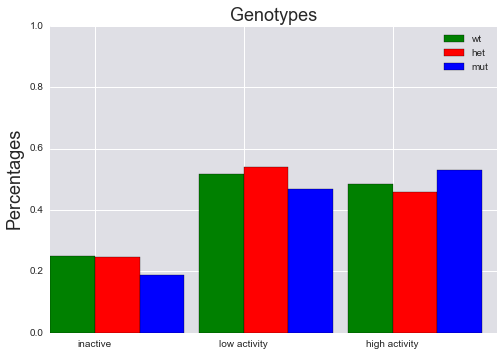

In [27]:
fig = plt.figure()
ax = plt.subplot(111)
x = np.arange(3)
wt = ax.bar(x, wt_per, width = 0.30, color='Green')
het = ax.bar(x + 0.30, het_per, width = 0.30, color='red')
mut = ax.bar(x + 0.60, mut_per, width = 0.30, color='blue')

ax.set_ylim(0,1)
ax.set_ylabel('Percentages')
ax.set_xticks(x+0.3)
ax.set_xticklabels(['inactive', 'low activity', 'high activity'])
plt.title ('Genotypes')
plt.legend(('wt', 'het', 'mut'), loc='upper right')

From the bar graph we can see that our hyptohesis that the mutant fish would have a smaller inactive percentage than the wild type is true, but by only four percent. Overall, the genotypes spend a similar percentage of time in each state, and it is hard to make firm conclusions without further statistical analysis.

While comparing the percent of the time the fish spend in each state by genotype gives us some insight on the effects of melatonin on activity and sleep behavior, it doesn't tell us much about how light and dark affect activity. (Let us pretend that we have no prior knowledge of whether zebrafish are diurnal or nocturnal.)

We can use our parameters to compare the total percentage of time spent in each state and compare it across days and nights. We can do this for each fish individually. As an example, we will calculate the percentage a particular fish, in this case FISH1, spends in each state during the day and night.

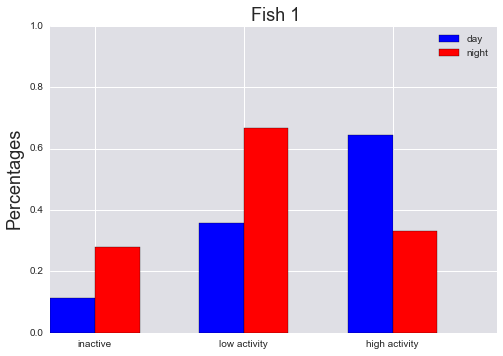

In [30]:
# Now we want to look at them per fish and compare day with night
# First we'll create a pie chart for the day and night time
df_day = df[df['light'] == True].groupby('fish')
df_night = df[df['light'] == False].groupby('fish')

# Now we want to identify the times a fish has zero activity in a one minute interval
inactive_day = df[(df['activity'] == 0) & (df['light'] == True)]
inactive_night = df[(df['activity'] == 0) & (df['light'] == False)]

# Now we want to idenitfy the times a fish has low activity
low_activity_day = df[(df['activity'] <= 2) & (df['light'] == True)]
low_activity_night = df[(df['activity'] <= 2) & (df['light'] == False)]

# Now we want to idenitfy the time a fish has high activity
high_activity_day = df[(df['activity'] > 2) & (df['light'] == True)]
high_activity_night = df[(df['activity'] > 2) & (df['light'] == False)]

# We want to group these state DataFrames by fish so we use groupby
df_inactive_day = inactive_day.groupby('fish')
df_low_activity_day = low_activity_day.groupby('fish')
df_high_activity_day = high_activity_day.groupby('fish')

df_inactive_night = inactive_night.groupby('fish')
df_low_activity_night = low_activity_night.groupby('fish')
df_high_activity_night = high_activity_night.groupby('fish')

# To find the percentage of time spent in each state we divide the number of intervals
# spent in each state by the total number of intervals during the day and night respectivitly
inactive_per_day = df_inactive_day['activity'].count()/df_day['activity'].count()
low_activity_per_day = df_low_activity_day['activity'].count()/df_day['activity'].count()
high_activity_per_day = df_high_activity_day['activity'].count()/df_day['activity'].count()

inactive_per_night = df_inactive_night['activity'].count()/df_night['activity'].count()
low_activity_per_night = df_low_activity_night['activity'].count()/df_night['activity'].count()
high_activity_per_night = df_high_activity_night['activity'].count()/df_night['activity'].count()

# We plot the differences
fish1_day = [inactive_per_day.FISH1, low_activity_per_day.FISH1, high_activity_per_day.FISH1]
fish1_night = [inactive_per_night.FISH1, low_activity_per_night.FISH1, high_activity_per_night.FISH1]
fig = plt.figure()
ax = plt.subplot(111)
x = np.arange(3)
day = ax.bar(x, fish1_day, width = 0.30, color='blue')
night = ax.bar(x + 0.3, fish1_night, width = 0.30, color='red')

ax.set_ylim(0,1)
ax.set_ylabel('Percentages')
ax.set_xticks(x+0.3)
ax.set_xticklabels(['inactive', 'low activity', 'high activity'])
plt.title ('Fish 1')
plt.legend(('day', 'night'), loc='upper right')

If we continue to do this for all 96 fish we would end up with 96 bar graphs (or a graph with 196 bars). This would not fit in a paper, nor would looking at 96 different graphs or a massive number of bars on a chart give anyone an easy feel for the what the data was telling them. A concise way to look at and present this data, although we may be losing some information about variability, would be to create a bar graph of the pooled percentage time spent in each state by all the fish.

We don't need to change our previous code much. We first need to separate our data into two `DataFrames`: one for the day and another for the night. Because we decided to pool the data, we do not group our `DataFrames` by fish, only by day and night. 

In [29]:
# Here is where the BIG difference is, we only splice the data by day and night, we do not group it by fish
df_day = df[df['light']==True]
df_night = df[df['light']==False]

#everything else we do is the same

# Here we define our states
# Now we want to identify the times a fish has zero activity in a one minute interval
inactive_day = df[(df['activity'] == 0) & (df['light'] == True)]

# Now we want to idenitfy the times a fish has low activity
low_activity_day = df[(df['activity'] <= 2) & (df['light'] == True)]

# Now we want to idenitfy the time a fish has high activity
high_activity_day = df[(df['activity'] > 2) & (df['light'] == True)]

# Now we want to identify the times a fish has zero activity in a one minute interval
inactive_night = df[(df['activity'] == 0) & (df['light'] == False)]

# Now we want to idenitfy the times a fish has low activity
low_activity_night = df[(df['activity'] <= 2) & (df['light'] == False)]

# Now we want to idenitfy the time a fish has high activity
high_activity_night = df[(df['activity'] > 2) & (df['light'] == False)]

Now all we need to do is take the number of intervals in each state by all fish and divide it by the total number of one minute intervals. This gives us the pooled percent time spent in each state.

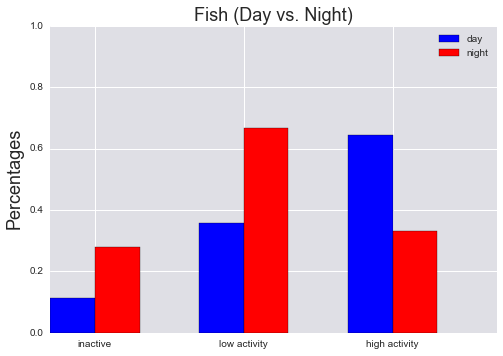

In [31]:
# To find the percentage of time spent in each state we divide the number of intervals
# spent in each state by the total number of intervals during the night
inactive_per_day = inactive_day['activity'].count()/df_day['activity'].count()
low_activity_per_day = low_activity_day['activity'].count()/df_day['activity'].count()
high_activity_per_day = high_activity_day['activity'].count()/df_day['activity'].count()

inactive_per_night = inactive_night['activity'].count()/df_night['activity'].count()
low_activity_per_night = low_activity_night['activity'].count()/df_night['activity'].count()
high_activity_per_night = high_activity_night['activity'].count()/df_night['activity'].count()

# Plot our data
fish1 = [inactive_per_day, low_activity_per_day, high_activity_per_day]
fish1 = [inactive_per_night, low_activity_per_night, high_activity_per_night]
fig = plt.figure()
ax = plt.subplot(111)
x = np.arange(3)
day = ax.bar(x, fish1_day, width = 0.30, color='blue')
night = ax.bar(x + 0.3, fish1_night, width = 0.30, color='red')

ax.set_ylim(0,1)
ax.set_ylabel('Percentages')
ax.set_xticks(x+0.3)
ax.set_xticklabels(['inactive', 'low activity', 'high activity'])
plt.title ('Fish (Day vs. Night)')
plt.legend(('day', 'night'), loc='upper right')

With this comparison of day vs. night, we can use our parameter of percent time spent in each activity state to determine when the fish are more likely to be sleeping. We can see clearly that at night the fish spend a greater percentage of time in an inactive state and in a low activity state than they do during the day. This lets us infer that the fish tend to sleep at night rather than during the day; in other words, zebrafish are diurnal organisms.  

<u>Strengths and weaknesses of this parameter</u>

In the end, we came to the conclusion that this parameter (percent time spent in different activity states, and in particular the pooled percentages) does not have many strengths as a sleep metric. In fact, the only strength we could think of is that with the bar plots, it is fairly easy to understand at a glance - although it is not necessarily easier to understand than the other two parameters we tried. Much more prominent than the strengths are the weaknesses of this parameter. By categorizing the activity into three discrete states, we lose some of the detail that was contained in the original continuous quantitative data. We also felt that having to display three activity states on the same plot made it difficult to compare the genotypes with beeswarm plots or box plots, which quickly start to look cluttered; this is one reason why we settled for pooling the data and using bar plots, which are usually less than ideal. Another important weakness is that by pooling the data across the fish, we lose information about the variability within genotypes or the presence of any outliers that may skew the results. 